In [1]:
from my_hmf import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
cosmo_params = {
    "H0": 70,
    "Om0": 0.294,
    "Ob0": 0.022 / 0.7**2,
    "ns": 0.965,
    "As": 2e-9
}

### Test du changement de redshift

In [3]:
z = 1

In [4]:
mf1 = My_Tinker08(z=z, cosmo_params=cosmo_params)
mf2 = My_Tinker08(z=0, cosmo_params=cosmo_params)

mf2.set_z(z=z)

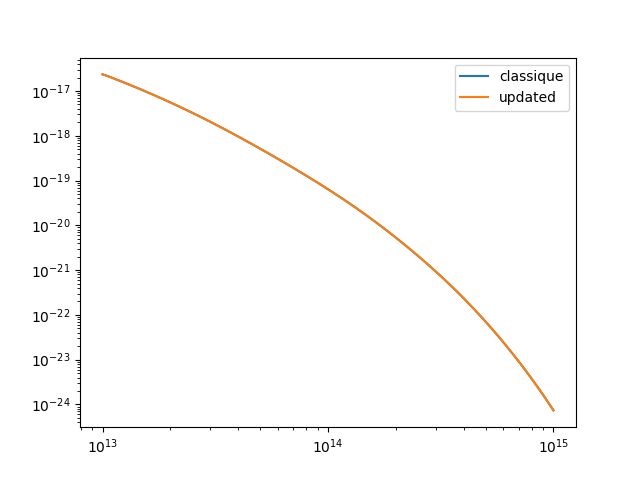

In [5]:
## Test dndm
plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.plot(mf1.m, mf1.dndm, label="classique")
plt.plot(mf2.m, mf2.dndm, label="updated")
plt.legend()
plt.show()

### Test du calcul du number count

In [3]:
N_z = 10
zmax = 1
Ncamb = 1000
resolution_z = 10


# def cutting_function(z):
#     return 8*np.log(z+1) * 1e14

z_data = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
Minf_data = np.array([0.8, 2, 3, 4.2, 5.2, 5.9, 6])*1e14
z = np.linspace(0,1,100)

def cutting_function(z):
    return np.interp(z, z_data, Minf_data)



def p(m,z):
    return (m>cutting_function(z)).astype(int)

In [10]:
number_count = get_number_count(cosmo_params, N_z, zmax, Ncamb, resolution_z, p=p)
number_countth = get_number_count(cosmo_params, N_z, zmax, Ncamb, resolution_z)

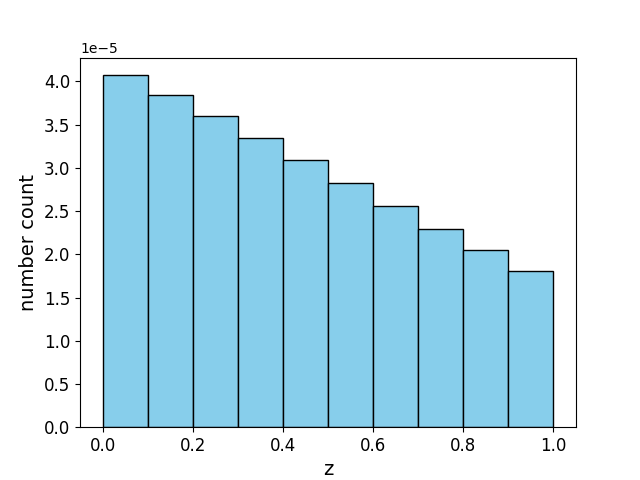

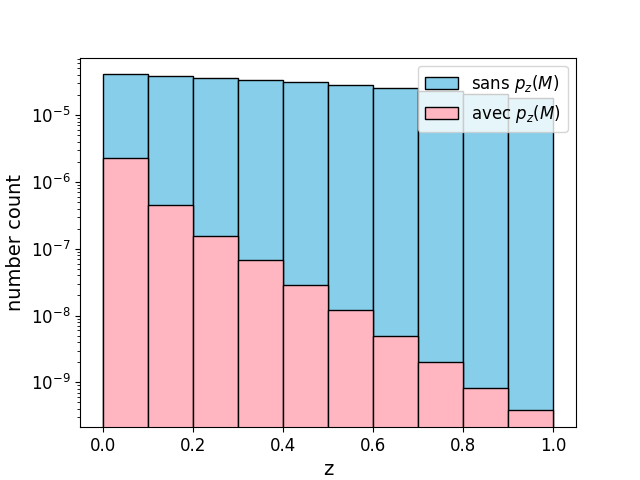

In [13]:
z = np.linspace(0, zmax, N_z, endpoint=False)

# Number count th seul
plt.figure()
# plt.xscale("log")
# plt.yscale("log")
plt.bar(z, number_countth, align = "edge", width = zmax/N_z, color = 'skyblue', edgecolor='black')
# plt.bar(z, number_count, align = "edge", width = zmax/N_z)
# plt.hist(number_countth,bins=20, color='skyblue', edgecolor='black')
plt.xlabel("z", size = 14)
plt.ylabel("number count", size = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Number count th + "réel"
plt.figure()
# plt.xscale("log")
plt.yscale("log")
plt.bar(z, number_countth, align = "edge", width = zmax/N_z, color = 'skyblue', edgecolor='black')
plt.bar(z, number_count, align = "edge", width = zmax/N_z, color = 'lightpink', edgecolor='black')
plt.xlabel("z", size = 14)
plt.ylabel("number count", size = 14)
plt.legend([r"sans $p_z(M)$", r"avec $p_z(M)$"], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

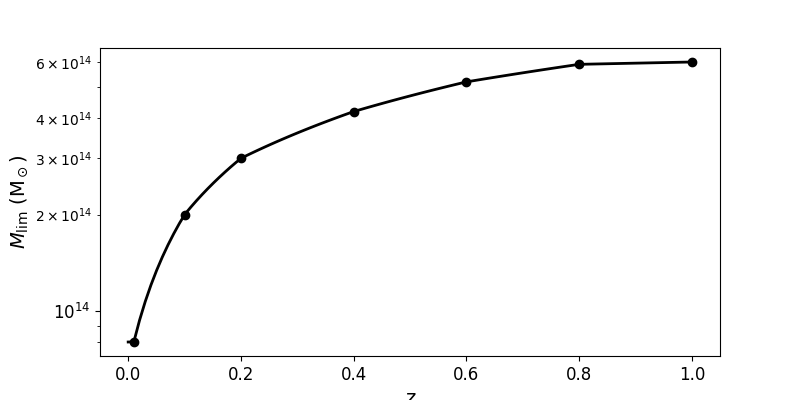

In [4]:
## Cutting function

z_data = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
Minf_data = np.array([0.8, 2, 3, 4.2, 5.2, 5.9, 6])*1e14
z = np.linspace(0,1,100)

# def f(z):
#     return 8*np.log(z+1) * 1e14
def f(z):
    return np.interp(z, z_data, Minf_data)

plt.figure(figsize=(8,4))
plt.plot(z, f(z), color='black', linewidth=2)
plt.plot(z_data, Minf_data, 'o', color = 'black')
plt.yscale("log")
plt.xlabel("z", size = 14)
plt.ylabel(r"$M_{\text{lim}}$ (M$_\odot$)", size = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Number count 2D

In [4]:
N_z = 10
N_m = 100
zmax = 1
Ncamb = 1000
resolution_z = 10

In [5]:
number_count = get_number_count(cosmo_params, N_z, zmax, Ncamb, resolution_z, N_m = N_m, p=p)

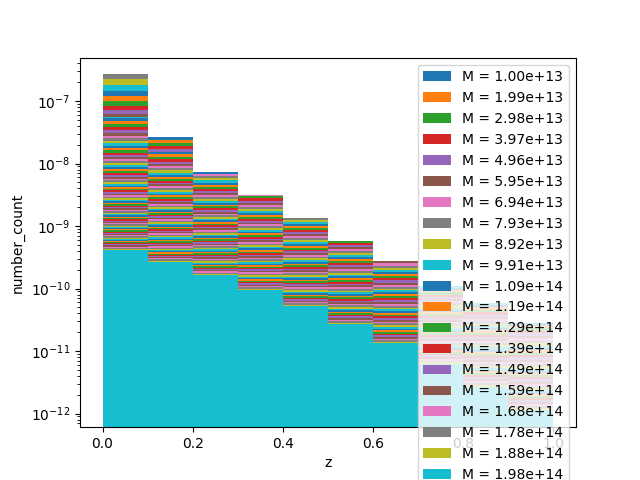

In [6]:
z = np.linspace(0, zmax, N_z, endpoint=False)
mf = My_Tinker08(z=0, cosmo_params=cosmo_params)

plt.figure()
for i in range(N_m):
    plt.bar(z, number_count[i], align = "edge", width = zmax/N_z, label = f'M = {mf.m[i*len(mf.m)//N_m]:.2e}')
plt.xlabel("z")
plt.ylabel("number_count")
plt.yscale("log")
plt.legend()
plt.show()

(array([0.  , 2.25, 4.5 , 6.75, 9.  ]),
 [Text(0.0, 0, '0.0'),
  Text(2.25, 0, '0.25'),
  Text(4.5, 0, '0.5'),
  Text(6.75, 0, '0.75'),
  Text(9.0, 0, '1.0')])

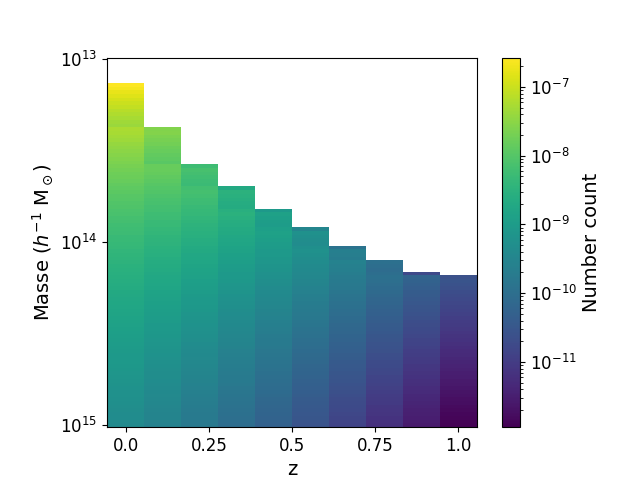

In [7]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter


plt.figure()
plt.imshow(number_count, norm = LogNorm(), aspect='equal')
cbar = plt.colorbar(label="Number count")
cbar.ax.tick_params(labelsize=12)
cbar.set_label("Number count", fontsize=14)  # Taille du label
plt.xticks(np.linspace(0, N_z-1, 5), np.linspace(0, zmax, 5))
plt.xlabel("z", size=14)
plt.ylabel(r"Masse ($h^{-1}$ M$_\odot$)", size=14)

# Configurer les ticks en puissance de 10 sur l'axe Y
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # Toujours utiliser la notation scientifique
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().set_aspect(N_z/N_m, adjustable='box')

y_ticks = np.linspace(mf.m[0], mf.m[-1], 3)
plt.yticks(np.linspace(0, N_m-1, 3), labels=[f"$10^{{{int(np.log10(tick))}}}$" for tick in y_ticks], fontsize=12)
plt.xticks(fontsize=12)




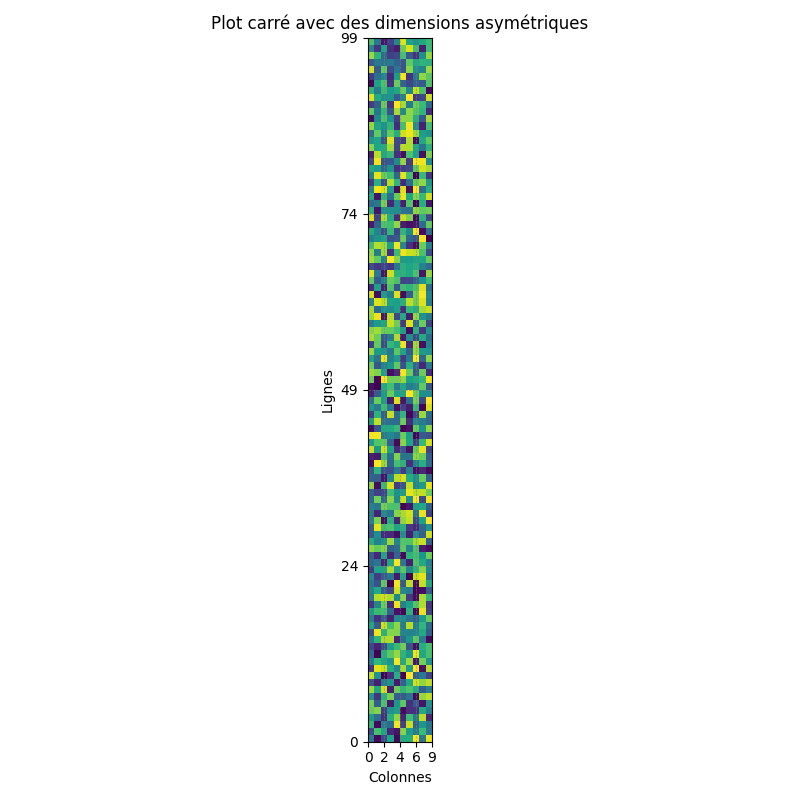

In [8]:
rows, cols = 100, 10
data = np.random.random((rows, cols))

# Tracer le tableau
plt.figure(figsize=(8, 8))  # Taille carrée de la figure
plt.imshow(data, cmap='viridis', aspect='equal', extent=[0, cols-1, 0, rows-1])

# Configurer les ticks et la notation scientifique
num_ticks = 5
y_ticks = np.linspace(0, rows-1, num_ticks)
x_ticks = np.linspace(0, cols-1, num_ticks)

plt.yticks(ticks=y_ticks, labels=[f"{int(tick)}" for tick in y_ticks])
plt.xticks(ticks=x_ticks, labels=[f"{int(tick)}" for tick in x_ticks])

# Ajouter des titres et étiquettes
plt.title("Plot carré avec des dimensions asymétriques")
plt.xlabel("Colonnes")
plt.ylabel("Lignes")

# Afficher la grille
plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

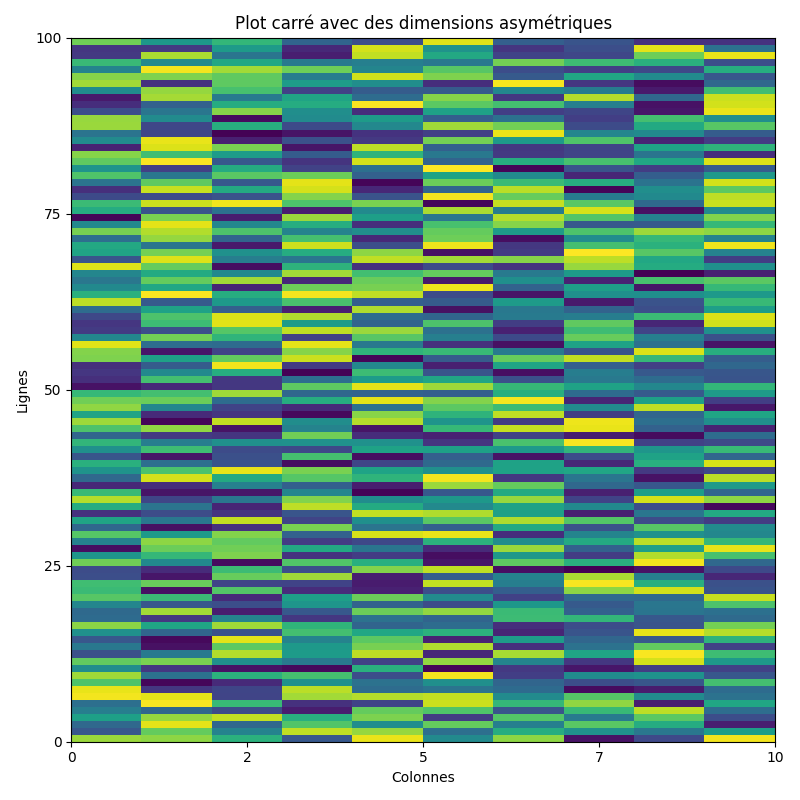

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Exemple de données avec des dimensions asymétriques
rows, cols = 100, 10
data = np.random.random((rows, cols))

# Calculer les ratios pour ajuster la figure
ratio = rows / cols
figsize = (8, 8)  # Taille globale carrée

# Tracer le tableau avec des ajustements
plt.figure(figsize=figsize)
plt.imshow(data, cmap='viridis', extent=[0, cols, 0, rows])

# Forcer un plot carré en ajustant manuellement les limites
plt.gca().set_aspect(1/ratio, adjustable='box')

# Configurer les ticks et axes
num_ticks = 5
plt.xticks(np.linspace(0, cols, num_ticks), labels=[f"{int(x)}" for x in np.linspace(0, cols, num_ticks)])
plt.yticks(np.linspace(0, rows, num_ticks), labels=[f"{int(y)}" for y in np.linspace(0, rows, num_ticks)])
plt.xlabel("Colonnes")
plt.ylabel("Lignes")
plt.title("Plot carré avec des dimensions asymétriques")

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\thoma\AppData\Local\Temp\ipykernel_12096\1378587693.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


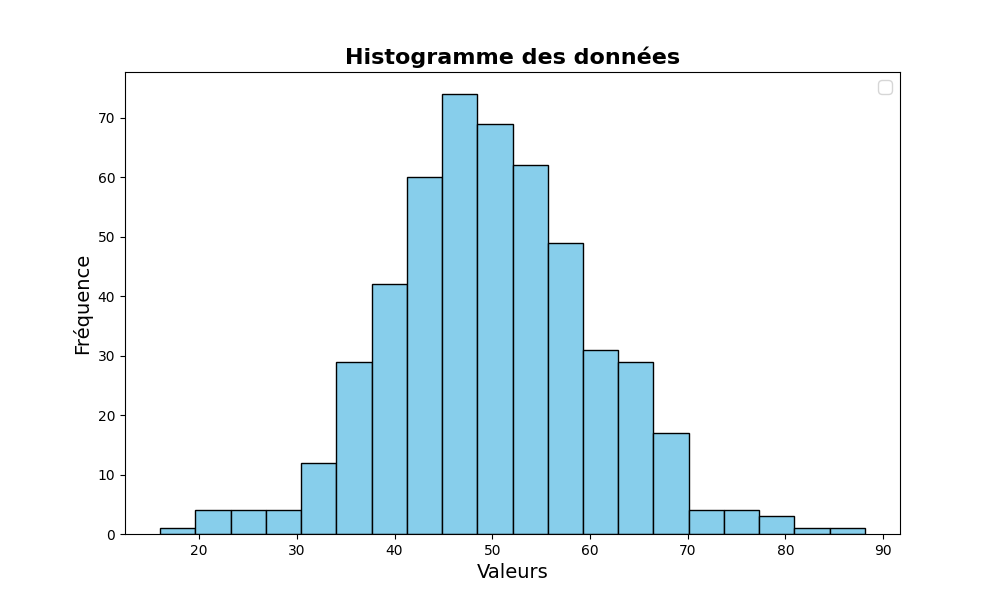

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Génération de données aléatoires
data = np.random.normal(loc=50, scale=10, size=500)  # Moyenne 50, écart-type 10, 500 valeurs

# Création de l'histogramme
plt.figure(figsize=(10, 6))  # Taille de la figure
plt.hist(
    data,
    bins=20, 
    color='skyblue', 
    edgecolor='black', 
    # alpha=0.7
    )

# Ajout de titres et de labels
plt.title("Histogramme des données", fontsize=16, fontweight='bold')
plt.xlabel("Valeurs", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)

# Grille et autres ajustements
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.axvline(data.mean(), color='red', linestyle='dashed', linewidth=1.5, label=f"Moyenne = {data.mean():.2f}")
plt.legend(fontsize=12)

# Affichage
# plt.tight_layout()
plt.show()
